In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import FunctionTransformer

In [ ]:
data = pd.read_csv("/content/Advertising.csv")

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
X = data.drop('Sales', axis=1)
y = data.Sales

In [ ]:

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = np.mean((y_predicted - y) ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
lr = LinearRegressionScratch(n_iterations=10000, learning_rate=0.0001)

In [ ]:
y.shape

(200,)

In [ ]:
lr.fit(X, y)

In [ ]:
lr.weights

array([4.07082139])

In [ ]:
lr.bias

14.021863697736793

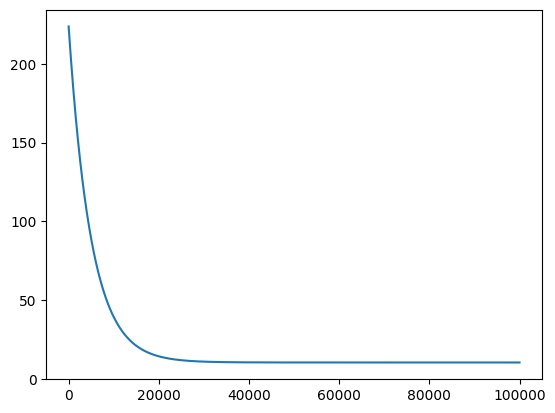

In [ ]:
plt.plot(lr.loss_history)

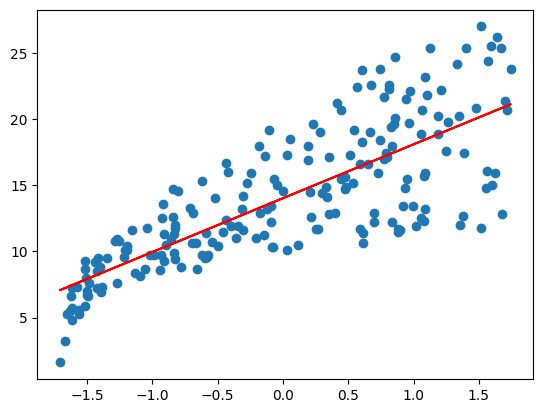

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.test_loss = 0.0

    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted_train = np.dot(X_train, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X_train.T, (y_predicted_train - y_train))
            db = (1 / n_samples) * np.sum(y_predicted_train - y_train)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss_train = np.mean((y_predicted_train - y_train) ** 2)
            self.loss_history.append(loss_train)

            y_predicted_test = np.dot(X_test, self.weights) + self.bias
            self.test_loss = np.mean((y_predicted_test - y_test) ** 2)


    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
y = y.reshape(-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegressionScratch(n_iterations=100000, learning_rate=0.001)

In [ ]:
lr.fit(X_train, y_train, X_test, y_test)

In [ ]:
lr.weights, lr.bias

(array([0.52004775, 0.36694718, 0.01885013]), 0.05538865906495036)

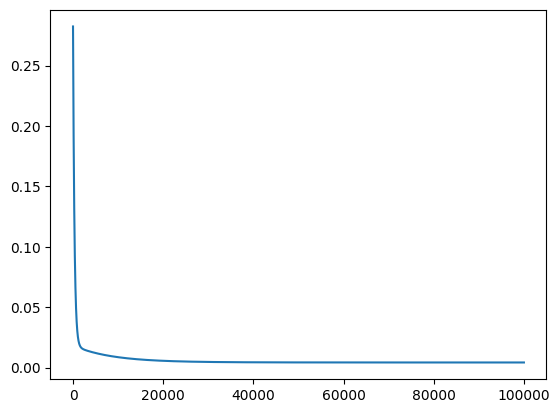

In [ ]:
plt.plot(lr.loss_history)

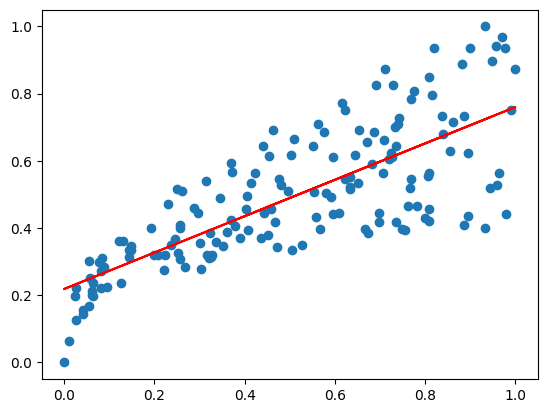

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color='red')

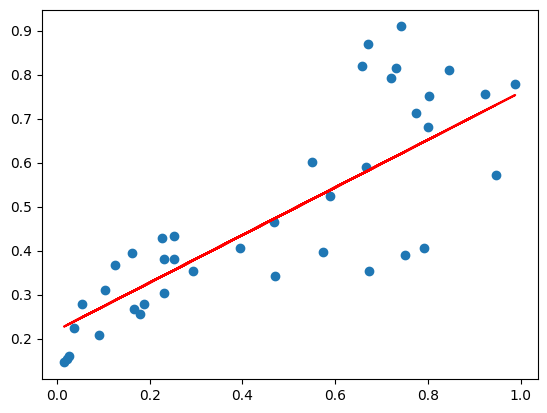

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color='red')

In [ ]:
lr.test_loss

0.015822224646571313

In [ ]:
lr.weights, lr.bias

(array([0.52004775, 0.36694718, 0.01885013]), 0.05538865906495036)

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


____

In [ ]:

import numpy as np
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, polynomial_degree=1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.test_loss = 0.0
        self.polynomial_degree = polynomial_degree

    def fit(self, X_train, y_train, X_test, y_test):
        if self.polynomial_degree > 1:
            X_train = np.hstack((X_train, X_train[:, 0].reshape(-1, 1) ** 2))
            X_test = np.hstack((X_test, X_test[:, 0].reshape(-1, 1) ** 2))

        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted_train = np.dot(X_train, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X_train.T, (y_predicted_train - y_train))
            db = (1 / n_samples) * np.sum(y_predicted_train - y_train)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss_train = np.mean((y_predicted_train - y_train) ** 2)
            self.loss_history.append(loss_train)

            y_predicted_test = np.dot(X_test, self.weights) + self.bias
            self.test_loss = np.mean((y_predicted_test - y_test) ** 2)


    def predict(self, X):
        if self.polynomial_degree > 1:
            X = np.hstack((X, X[:, 0].reshape(-1, 1) ** 2))


        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted


In [ ]:
poly_lr = LinearRegressionScratch(learning_rate=0.001, n_iterations=100000, polynomial_degree=2)

In [ ]:
poly_lr.fit(X_train, y_train, X_test, y_test)

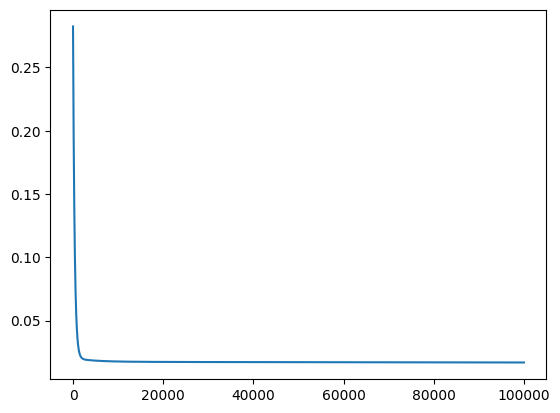

In [ ]:
plt.plot(poly_lr.loss_history)

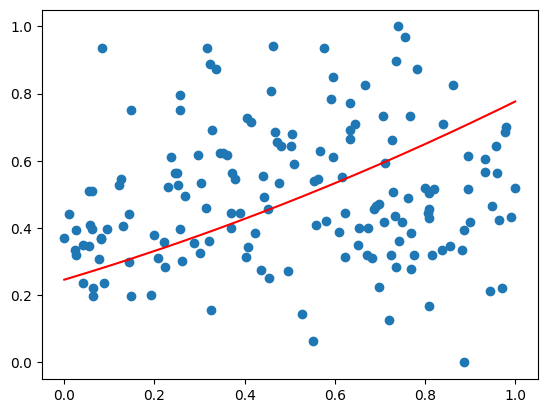

In [ ]:

X_train_sort = np.sort(X_train, axis=0)
plt.scatter(X_train_sort, y_train)
plt.plot(X_train_sort, poly_lr.predict(X_train_sort), color='red')

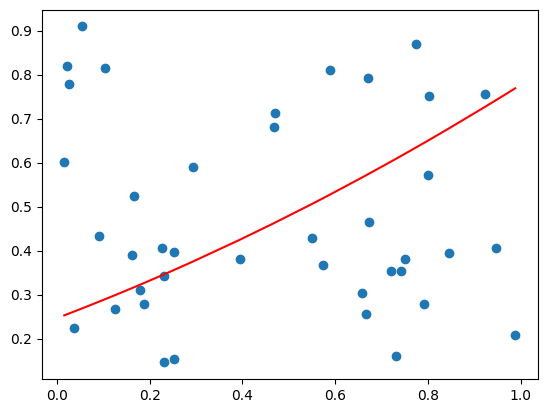

In [ ]:
X_test_sort = np.sort(X_test, axis=0)
plt.scatter(X_test_sort, y_test)
plt.plot(X_test_sort, poly_lr.predict(X_test_sort), color='red')

In [ ]:
poly_lr.test_loss

0.016386939227682817

In [ ]:
# prompt: calculate the R^2 accuracy for the model from scratch

from sklearn.metrics import r2_score

y_pred_train = poly_lr.predict(X_train)
y_pred_test = poly_lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R^2 accuracy for training set: {r2_train}")
print(f"R^2 accuracy for test set: {r2_test}")


R^2 accuracy for training set: 0.5801485740323857
R^2 accuracy for test set: 0.6650508875551648


In [ ]:
from sklearn.metrics import r2_score

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R^2 accuracy for training set: {r2_train}")
print(f"R^2 accuracy for test set: {r2_test}")


R^2 accuracy for training set: 0.8956692280075409
R^2 accuracy for test set: 0.8986499269320063
